In [26]:
import os
import pandas as pd           # Handle tabular survey data (DataFrame-based pipeline)
import numpy as np           # Load trained machine learning models from disk

from joblib import load


In [27]:
def compute_ai_governance_readiness(
    df,
    # DataFrame containing the survey responses

    items=("AIGR1", "AIGR2", "AIGR3","AIGR4"),
    # Survey items used to measure AI governance vision

    method="mean",
    # Method used to compute the score (mean of the items),
    # kept for conceptual clarity even if only one method is currently used

    score_col="AI_Governance_readiness_score",
    # Name of the column that will store the raw AI governance vision score

    pct_col="AI_Governance_readiness_Pct",
    # Name of the column that will store the percentage score

    scale_min=1,
    # Minimum value of the Likert scale used in the questionnaire

    scale_max=4
    # Maximum value of the Likert scale used in the questionnaire
):
    # -------------------------------------------------
    # Step 1: Compute the raw AI governance vision score
    # -------------------------------------------------

    # Compute the row-wise mean of the VUTAI items
    # Each row corresponds to one institution or respondent
    score = df[list(items)].mean(axis=1)

    # Store the raw score in the DataFrame
    df[score_col] = score

    # -------------------------------------------------
    # Step 2: Convert the raw score into a percentage
    # -------------------------------------------------

    # Transform the raw score into a 0–100 percentage
    # This makes the result easier to interpret and compare
    df[pct_col] = ((score - scale_min) / (scale_max - scale_min)) * 100

    # Return the DataFrame with the computed scores
    return df


def interpret_readiness_pct(pct):
    # This function converts a percentage score
    # into a qualitative interpretation

    # If the score is below 33%, AI governance vision is low
    if pct < 33:
        return "Low AI Governance Readiness"

    # If the score is between 33% and 66%, vision is moderate
    elif pct < 66:
        return "Moderate AI Governance Readiness"

    # If the score is 66% or higher, vision is high
    else:
        return "High AI Governance Readiness"


In [28]:
# ============================================================
# Feature configuration for ML-based AI governance prediction
# ============================================================

FEATURE_ORDER = {
    "OAC": ["OAC1", "OAC2", "OAC3", "OAC4"],
    "DIR": ["DIR1", "DIR2", "DIR3", "DIR4"],
    "RAI": ["RAI1", "RAI2", "RAI3", "RAI4"],
    "PVO": ["PVO1", "PVO2", "PVO3", "PVO4"],
    "EST": ["EST1", "EST2", "EST3", "EST4"]
}

# Ordered list of input features used by the trained ML models.
# IMPORTANT: The order must be exactly the same as during training,
# otherwise, the predictions will be incorrect.
# ============================================================
# Required libraries for model loading and file handling
# ============================================================

import os
from joblib import load

# Model storage configuration
MODEL_DIR = "Models"
# Path to the directory where trained ML models are stored
loaded_models = {}

# We only care about predicting the three vision items
READINESS_TARGETS = ["AIGR1", "AIGR2", "AIGR3","AIGR4"]

for target in READINESS_TARGETS:

    # Find the saved model file for this target
    matching_files = [
        f for f in os.listdir(MODEL_DIR)
        if f.startswith(f"ML_BestModel_AIGR_{target}_") and f.endswith(".joblib")
    ]

    if len(matching_files) == 0:
        raise FileNotFoundError(f"No saved best model found for {target}")

    if len(matching_files) > 1:
        raise ValueError(f"Multiple models found for {target}: {matching_files}")

    model_file = matching_files[0]
    model_path = os.path.join(MODEL_DIR, model_file)

    # Load model
    loaded_models[target] = {
        "model": load(model_path),
        "features": FEATURE_ORDER
    }
    
# Confirmation message to ensure correct model loading
    
    print(f"Loaded best model for {target}: {model_file}")


Loaded best model for AIGR1: ML_BestModel_AIGR_AIGR1_RidgeRegression.joblib
Loaded best model for AIGR2: ML_BestModel_AIGR_AIGR2_RidgeRegression.joblib
Loaded best model for AIGR3: ML_BestModel_AIGR_AIGR3_RidgeRegression.joblib
Loaded best model for AIGR4: ML_BestModel_AIGR_AIGR4_RidgeRegression.joblib


In [29]:
#calculate the vision score of M5 University

In [30]:
import numpy as np  # Used for numerical operations if needed later in the pipeline
import pandas as pd  # Used to load and manipulate tabular data (DataFrame structure)

# Load data
df = pd.read_excel("Data_PLS.xlsx")

# Sanity check
print(df.shape) 
# Print the dataset dimensions (number of rows and columns)
print(df.columns.tolist())
# Print the list of column names to verify correct data loading

(392, 28)
['OAC1', 'OAC2', 'OAC3', 'OAC4', 'DIR1', 'DIR2', 'DIR3', 'DIR4', 'RAI1', 'RAI2', 'RAI3', 'RAI4', 'PVO1', 'PVO2', 'PVO3', 'PVO4', 'IP1', 'IP2', 'IP3', 'IP4', 'EST1', 'EST2', 'EST3', 'EST4', 'AIGR1', 'AIGR2', 'AIGR3', 'AIGR4']


In [31]:
# Compute Vision score and percentage on training data
df = compute_ai_governance_readiness(
    df,
    # Input DataFrame containing the survey responses
    items=("AIGR1", "AIGR2", "AIGR3","AIGR4"),
    
     # Survey items used to compute the AI governance vision score
    score_col="AI_Governance_readiness_score",
    
    # Column name for the computed raw vision score
    pct_col="AI_Governance_readiness_Pct",
      # Column name for the computed percentage score
    
    scale_min=1,
     # Minimum value of the Likert scale
    
    scale_max=5
     # Minimum value of the Likert scale
)


In [32]:
# Compute summary statistics for AI governance vision (raw score)

overall_readiness_mean = df["AI_Governance_readiness_score"].mean()
# Compute the average AI governance vision score across all observationsoverall_vision_std = df["AI_Governance_Vision"].std()

overall_readiness_std = df["AI_Governance_readiness_score"].std()
# Compute the standard deviation of the AI governance vision score

print(f"Overall AI Governance Readiness (mean): {overall_readiness_mean:.3f}")
# Display the mean raw vision score with three decimal precision
print(f"Standard deviation: {overall_readiness_std:.3f}")
# Display the standard deviation of the raw vision score

Overall AI Governance Readiness (mean): 3.818
Standard deviation: 0.854


In [33]:
# Compute summary statistics for AI governance vision (percentage score)

overall_readiness_pct_mean = df["AI_Governance_readiness_Pct"].mean()
# Compute the average AI governance vision percentage score

overall_readiness_pct_std = df["AI_Governance_readiness_Pct"].std()
# Compute the standard deviation of the AI governance vision percentage score

print(f"Overall AI Governance Readiness (%): {overall_readiness_pct_mean:.1f}%")
# Display the mean percentage score (rounded to one decimal)

print(f"Standard deviation (%): {overall_readiness_pct_std:.1f}%")
# Display the standard deviation of the percentage score

Overall AI Governance Readiness (%): 70.4%
Standard deviation (%): 21.4%


In [34]:
# Create a summary table for AI governance vision

# List of reported metrics included in the summary table
readiness_summary = pd.DataFrame({
    "Metric": [
        "Mean readiness Score (1–5)",
        "Std readiness Score (1–5)",
        "Mean readiness (%)",
        "Std readiness (%)"
    ],
    # Corresponding numerical values for each metric
    "Value": [
        overall_readiness_mean,
        overall_readiness_std,
        overall_readiness_pct_mean,
        overall_readiness_pct_std
    ]
})
# Display the summary table
readiness_summary


,Metric,Value
0,Mean readiness Score (1–5),3.817602
1,Std readiness Score (1–5),0.854443
2,Mean readiness (%),70.440051
3,Std readiness (%),21.361077


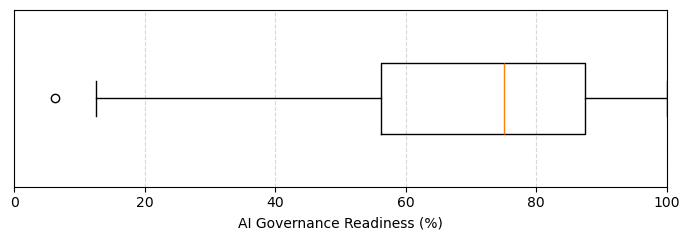

In [35]:
# Create a figure with a controlled aspect ratio

import matplotlib.pyplot as plt

# Vision percentage values
readiness_pct = df["AI_Governance_readiness_Pct"]

# Initialize the figure and axis with a compact horizontal layout
fig, ax = plt.subplots(figsize=(7, 2.5))

# Horizontal boxplot of AI governance vision (%)
ax.boxplot(
    readiness_pct,
    vert=False,
    widths=0.4,
    patch_artist=False
)

# Use a horizontal orientation to emphasize score distribution
# Labels
ax.set_xlabel("AI Governance Readiness (%)")

# Axis limits
ax.set_xlim(0, 100)

# Remove y-axis clutter
ax.set_yticks([])

# Grid
ax.grid(axis="x", linestyle="--", alpha=0.5)

# Tight layout
plt.tight_layout()

# ✅ SAVE AS VECTOR FORMATS
plt.savefig("Results/AI_Governance_Readiness_Boxplot.svg", format="svg", bbox_inches="tight")
plt.savefig("Results/AI_Governance_Readiness_Boxplot.pdf", format="pdf", bbox_inches="tight")

# Show (optional)
plt.show()


In [36]:

# --------------------------------------------------
# 1. Feature order definition (by construct)
# --------------------------------------------------
FEATURE_ORDER = {
    "OAC": ["OAC1", "OAC2", "OAC3", "OAC4"],
    "DIR": ["DIR1", "DIR2", "DIR3", "DIR4"],
    "RAI": ["RAI1", "RAI2", "RAI3", "RAI4"],
    "PVO": ["PVO1", "PVO2", "PVO3", "PVO4"],
    "EST": ["EST1", "EST2", "EST3", "EST4"]
}

# Flatten feature order into a single list (CRITICAL)
FEATURE_LIST = [f for group in FEATURE_ORDER.values() for f in group]

# --------------------------------------------------
# 2. New input data (one institution / decision unit)
# --------------------------------------------------
new_data = {
    "OAC1": 4, "OAC2": 5, "OAC3": 4, "OAC4": 4,
    "DIR1": 5, "DIR2": 4, "DIR3": 4, "DIR4": 5,
    "RAI1": 4, "RAI2": 4, "RAI3": 5, "RAI4": 4,
    "PVO1": 3, "PVO2": 4, "PVO3": 3, "PVO4": 4,
    "EST1": 4, "EST2": 5, "EST3": 4, "EST4": 4
}

# --------------------------------------------------
# 3. Convert input to DataFrame & align columns
# --------------------------------------------------
new_df = pd.DataFrame([new_data])

# Ensure correct column order (same as training)
new_df = new_df[FEATURE_LIST]

# --------------------------------------------------
# 4. Generate predictions
# --------------------------------------------------
predictions = {}

for target, content in loaded_models.items():
    model = content["model"]
    y_pred = model.predict(new_df)
    predictions[target] = float(y_pred[0])

# --------------------------------------------------
# 5. Convert predictions to DataFrame (optional)
# --------------------------------------------------
predictions_df = pd.DataFrame.from_dict(
    predictions,
    orient="index",
    columns=["Predicted_Value"]
)

predictions_df


,Predicted_Value
AIGR1,4.455684
AIGR2,4.643121
AIGR3,4.504793
AIGR4,4.773889


In [37]:
# Validate that the input features match the expected training features

expected = set(FEATURE_LIST)     # ✔ indicator-level features used in training
actual = set(new_df.columns)     # ✔ columns in new input data

if expected != actual:
    missing = expected - actual
    extra = actual - expected

    raise ValueError(
        f"Feature mismatch detected!\n"
        f"Missing features: {missing}\n"
        f"Unexpected features: {extra}"
    )


In [38]:
# Attach predicted target values to the input DataFrame


for k, v in predictions.items():
    # For each predicted target variable (VUTAI1, VUTAI2, VUTAI3),
    # add the predicted value as a new column in the DataFrame
    new_df[k] = v
    
    # Display the predicted vision items (sanity check)

new_df[["AIGR1", "AIGR2", "AIGR3","AIGR4"]]
# Show predicted values for the three AI governance vision indicators


,AIGR1,AIGR2,AIGR3,AIGR4
0,4.455684,4.643121,4.504793,4.773889


In [39]:
# Compute overall AI governance vision score and percentage from predictions

new_df = compute_ai_governance_readiness(
    new_df,
    # Use the new dataset that now includes predicted VUTAI values
    
    items=("AIGR1", "AIGR2", "AIGR3","AIGR4"),
    # Compute the vision score using the predicted vision items
    
    score_col="AI_Governance_readiness_score",
    # Store the computed raw score in this column
    
    pct_col="AI_Governance_readiness_Pct",
    # Store the computed percentage score in this column
    
    scale_min=1,
    # Minimum Likert scale value used for normalization
    scale_max=5
    # Maximum Likert scale value used for normalization
)


In [40]:
# Convert the percentage score into an interpretable vision level

new_df["Readiness_Level"] = new_df["AI_Governance_readiness_Pct"].apply(
    interpret_readiness_pct
)
# Create a qualitative label (Low / Moderate / High) based on the percentage score

In [41]:
# Create the final output table with prediction results

final_table = new_df[[
    "AIGR1", "AIGR2", "AIGR3","AIGR4",
    # Predicted AI governance vision items
    "AI_Governance_readiness_score",
    # Computed overall AI governance vision score (raw scale)
    "AI_Governance_readiness_Pct",
    # Computed AI governance vision score expressed as a percentage
    "Readiness_Level"
    # Qualitative interpretation of the vision score (Low / Moderate / High)
]]
# Display the final results table
final_table


,AIGR1,AIGR2,AIGR3,AIGR4,AI_Governance_readiness_score,AI_Governance_readiness_Pct,Readiness_Level
0,4.455684,4.643121,4.504793,4.773889,4.594372,89.859293,High AI Governance Readiness
